In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras. models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow. keras.layers import Dropout, Flatten

In [2]:
mnist = tf.keras. datasets .mnist

In [3]:
(x_train, y_train) , (x_test, y_test ) = mnist. load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

11490434/11490434 [==============================] - 5s 0us/step


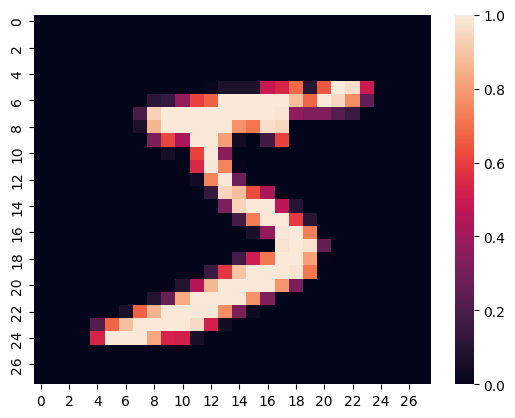

In [4]:
sns.heatmap(x_train[0])
plt.show()

In [5]:
model = Sequential([
Flatten(input_shape=(28, 28)), Dense(128, activation="relu"),
Dropout (0.2),
Dense(10)
])

In [6]:
predictions = model(x_train[ :1]).numpy()


In [7]:
predictions

array([[ 0.36038935, -0.31601983,  0.08757829,  0.5824513 , -0.27005363,
         0.2294249 , -0.06375331, -0.17577954,  0.2874431 , -0.06948842]],
      dtype=float32)

In [8]:
tf.nn.softmax (predictions).numpy()

array([[0.12907416, 0.06562639, 0.09825596, 0.16116828, 0.0687134 ,
        0.11323017, 0.08445716, 0.07550646, 0.11999389, 0.08397418]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
model.compile(optimizer="adam" , loss = loss_fn, metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2986 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1445 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1057 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9766


In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0695 - accuracy: 0.9782 - 1s/epoch - 4ms/step


[0.0695279911160469, 0.9782000184059143]

In [13]:
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0669 - val_accuracy: 0.9791
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.0631 - val_accuracy: 0.9798
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0629 - val_accuracy: 0.9809
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0623 - val_accuracy: 0.9798
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0629 - val_accuracy: 0.9801


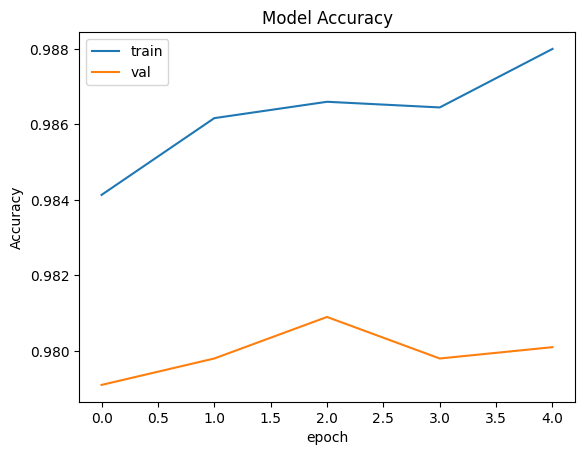

In [14]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot (val.history [ "val_accuracy"])
plt.legend(["train", "val"])
plt.show()